# Homework 2 (80 points)

In this homework, you will continue to explore the performance of famous sorting algorithms, and you will practice solving an algorithmic problem using the divide and conquer methodology.

The objectives for this homework are:

* Understand that memory usage can also be a function of input size
* Understand the limitations of worst-case analysis
* Understand the motivation for average-case analysis
* Understand how data-structures can help in solving algorithmic problems
* Understand the subtle relationship between theory and practice in analysis of algorithms
* Learn about priority queues and heaps
* Practice your divide and conquer problem-solving skills

In [1]:
import array
import random
import time
import matplotlib.pyplot as plt

We will use one new library, tracemalloc, to measure the memory usage of our algorithms. 

In [2]:
import tracemalloc

The usual suspects: timing, generating examples, running experiments and plotting... Watch out, the compareTwoFunctions was modified to be more general.

In [3]:
def timer(f,arr):
    assert(callable(f))
    assert(isinstance(arr,array.array))
    start = time.time()
    f(arr)
    end = time.time()
    return end - start

In [4]:
def gen_decreasing(n):
    return array.array('i',range(n,1,-1))

In [5]:
def gen_random(n):
    assert(isinstance(n,int))
    assert(n >= 0)
    random.seed()
    a = array.array('i',n * [0])
    for i in range(n):
        a[i] = random.randint(-1000,1000)
    return a

The compareTwoFunctions now takes two extra arguments: gen is the function that will be used to generate examples, meas is the function that is used to measure the code execution.

In [6]:
def compareTwoFunctions(gen,meas,f1,f2,n):
    
    time_f1 = array.array('f',n * [0])
    time_f2 = array.array('f',n * [0])
    for i in range(n):
        a = gen(i+2)
        time_f1[i] = meas(f1,a)
        time_f2[i] = meas(f2,a)
        
    x = range(n)
    plt.xlabel('Problem size')
    plt.ylabel('Time (s)')
    plt.plot(x, time_f1, "-b", label=f1.__name__)
    plt.plot(x, time_f2, "-r", label=f2.__name__)
    plt.title("Comparison of different functions") 
    plt.legend(loc="upper left")

We will compare our new sorting algorithms against mergeSort.

In [7]:
def merge(arr, l, m, r): 
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(m,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(m >= l)
    assert(r >= m)
    n1 = m - l + 1
    n2 = r- m 
  
    L = [0] * (n1) 
    R = [0] * (n2) 
  
    for i in range(0 , n1): 
        L[i] = arr[l + i] 
  
    for j in range(0 , n2): 
        R[j] = arr[m + 1 + j] 
  
    i = 0     
    j = 0      
    k = l     
  
    while i < n1 and j < n2 : 
        if L[i] <= R[j]: 
            arr[k] = L[i] 
            i += 1
        else: 
            arr[k] = R[j] 
            j += 1
        k += 1
  
    while i < n1: 
        arr[k] = L[i] 
        i += 1
        k += 1
  
    while j < n2: 
        arr[k] = R[j] 
        j += 1
        k += 1

In [8]:
def mergeSortAux(arr,l,r):
    assert(isinstance(arr,array.array))
    assert(isinstance(l,int))
    assert(isinstance(r,int))
    assert(l >= 0)
    assert(r >= l)
    assert(len(arr) >= 2)
    if l < r: 
        m = (l+(r-1))//2
        mergeSortAux(arr, l, m) 
        mergeSortAux(arr, m+1, r) 
        merge(arr, l, m, r) 

In [9]:
def mergeSort(arr):
    assert(isinstance(arr,array.array))
    if (len(arr) >= 2):
        mergeSortAux(arr,0,len(arr)-1)

# Part 1 (10 points)

In this part, you will implement the quicksort algorithm and compare it against mergesort.

**Problem 1. (5 points): implement the partition function. Input: array arr, indices low and high delimitating subarray to be partitioned. Output: index of pivot position. IMPORTANT: choose the pivot at random.**

In [10]:
def partition(arr, low, high):
    assert(isinstance(arr,array.array))
    assert(isinstance(low,int))
    assert(isinstance(high,int))
    assert(low <= high)
    assert(len(arr) > 1)
    
    pivotIndex = random.randint(low, high)
    pivotValue = arr[pivotIndex]
    
    arr[pivotIndex], arr[high] = arr[high], arr[pivotIndex]
    storeIndex = low 
    
    for i in range(low, high):
        if arr[i] < pivotValue:
            arr[i], arr[storeIndex] = arr[storeIndex], arr[i]
            storeIndex += 1
            
    arr[storeIndex], arr[high] = arr[high], arr[storeIndex]
    
    return storeIndex

**Problem 2. (3 points): implement the recursive definition of quicksort. Input: array arr, indices low and high delimitating subarray to be sorted. No output.**

In [12]:
def quickSortAux(arr, low, high):
    assert(isinstance(arr,array.array))
    assert(isinstance(low,int))
    assert(isinstance(high,int))
    assert(len(arr) > 1)
    
    if len(arr) == 1:
        return arr
    
    if low < high:
        p = partition(arr, low, high)
        
        quickSortAux(arr, low, p-1)
        quickSortAux(arr, p+1, high)

In [13]:
def quickSort(arr):
    assert(isinstance(arr,array.array))
    n = len(arr)
    if (n <= 1):
        return
    random.seed()
    quickSortAux(arr, 0, n-1) 

In class, we will see that in the worst-case, the number of comparisons of quicksort is in O(n * n). So, our current theoretical analysis tells us that it is a bad algorithm, and much worse than merge sort with his O(n log n) number of comparisons in the worst-case. Let's verify this on random inputs. 

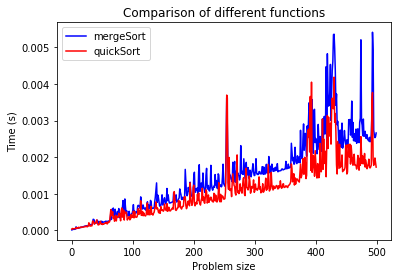

In [17]:
compareTwoFunctions(gen_random,timer,mergeSort,quickSort,500)

Well, it looks like we were wrong. quicksort does not behave as predicted by our analysis. The crux of the problem is that to simplify our analysis, we considered the input to be the worst case, but apparently, worst-case analysis doesn't do justice to quicksort. Let's run an experiment where the examples are not random but the worst case.

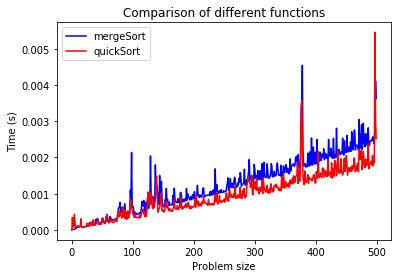

In [18]:
compareTwoFunctions(gen_decreasing,timer,mergeSort,quickSort,500)

Surprise: quicksort stills works better than mergeSort. We will discuss this in class, but for now, try to think about what can explain what we are seeing.

**Problem 3. (2 points): implement a function that measures the amount of memory allocated by the algorithm, as presented in class.**

In [19]:
def memSpy(f, arr):
    tracemalloc.start()
    f(arr)
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    return peak / 10**6

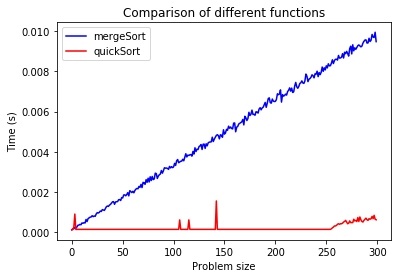

In [20]:
compareTwoFunctions(gen_random,memSpy,mergeSort,quickSort,300)

As you can see, mergeSort and Quicksort have very different memory requirements. 

# Part 2 (40 points)

**Problem 4. (20 points): implement the min heap data structures. The minheap data type offers two methods: inserting an integer into the minheap, and deleting and returning the minimum value in the heap. Of course, to implement these functions, you should seriously consider adding more methods such as sink, swim, and perhaps more.**

In [21]:
class MinHeap:
    def __init__(self):
        self.heap_list = [0]
        self.current_size = 0
 
    def swim(self, i):
        while i // 2 > 0:
            if self.heap_list[i] < self.heap_list[i // 2]:
                self.heap_list[i], self.heap_list[i // 2] = self.heap_list[i // 2], self.heap_list[i]
            i = i // 2
 
    def insert(self, k):
        self.heap_list.append(k)
        self.current_size += 1
        self.swim(self.current_size)
 
    def sink(self, i):
        while (i * 2) <= self.current_size:
            mc = self.min_child(i)
            if self.heap_list[i] > self.heap_list[mc]:
                self.heap_list[i], self.heap_list[mc] = self.heap_list[mc], self.heap_list[i]
            i = mc
 
    def min_child(self, i):
        if (i * 2)+1 > self.current_size:
            return i * 2
        else:
            if self.heap_list[i*2] < self.heap_list[(i*2)+1]:
                return i * 2
            else:
                return (i * 2) + 1
 
    def delete_min(self):
        if len(self.heap_list) == 1:
            return 'Empty'
 
        root = self.heap_list[1]
        self.heap_list[1] = self.heap_list[self.current_size]
        *self.heap_list, _ = self.heap_list
 
        self.current_size -= 1
        self.sink(1)
 
        return root
    
    def print_heap(self):
        return self.heap_list

**Problem 5. (5 points): implement a simple sorting algorithm that uses the minheap. This algorithm works simply by inserting all the values in the minheap, to then extract them one by one.**

In [30]:
def heapSortFake(arr):
    assert(isinstance(arr,array.array))
    n = len(arr)
    mh = MinHeap()
    
    for i in range(n):
        mh.insert(arr[i])
    
    # This method was implemented during class - however, since the problem says to "extract" the value one by one
    """
    for i in range(n):
        arr[i] = mh.delete_min()
    """
    
    # the method below is implemented instead
    for i in range(n):
        print(mh.delete_min())

In [31]:
arr = array.array('i', [5,4,3,2,1])
heapSortFake(arr)

1
2
3
4
5


**Problem 6. (10 points): implement the heapify function. input: array arr, length of the subarray under consideration array n, position of the index to sink i. Heapify should sink the value at i to simulate a MaxHeap.**

In [32]:
def heapify(arr, n, i):
    assert(isinstance(arr,array.array))
    assert(isinstance(n,int))
    assert(isinstance(i,int))
    assert(i >= 0 and i <= n)
    maxRoot = i 
    left = (i * 2) + 1
    right = (i * 2)
    
    if left < n and arr[maxRoot] < arr[left]:
        maxRoot = left 
        
    if right < n and arr[maxRoot] < arr[right]:
        maxRoot = right
        
    if maxRoot != i:
        arr[i], arr[maxRoot] = arr[maxRoot], arr[i]
        
        heapify(arr, n, maxRoot)

**Problem 7. (5 points): implement the heapSort algorithm, that is, sort the input array by first turning it into a max heap and then extracting and placing the maximum values one by one while maintaining the heap. Input: array arr. No output. Your implementation of heapSort should use the heapify method. This is a very difficult exercise, you are strongly encouraged to watch the lecture.**

In [33]:
def heapSort(arr):
    assert(isinstance(arr,array.array))
    n = len(arr)
    
    for i in range(n//2-1, -1, -1):
        heapify(arr, n, i)
    
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

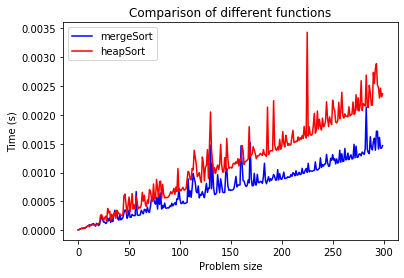

In [34]:
compareTwoFunctions(gen_random,timer,mergeSort,heapSort,300)

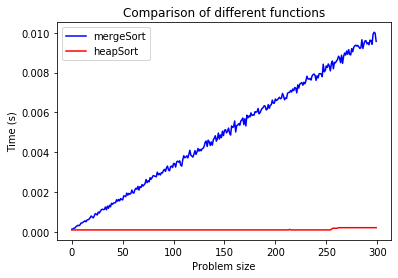

In [35]:
compareTwoFunctions(gen_random,memSpy,mergeSort,heapSort,300)

You have now implemented insertion sort and all 3 famous sorting algorithms: mergesort, quicksort, and heapsort. Analysis of algorithms proved somewhat successful. An analysis of the number of comparisons allowed us to predict that mergesort and heapsort would be significantly better than insertion sort. Moreover, an analysis of memory usage allowed us to predict that heapsort would fare better than mergesort in terms of memory usage. But our theoretical work has also shown its limits in two ways. First, even though in theory heapsort is better than mergesort, in practice, it is not that simple. This is because our analysis make a lot of simplifying assumptions and hide details. While we can expect heapsort to be much better than mergesort for extremely large arrays, this may not be that relevant in practice. The bigger failure of theory relates to quicksort. In theory, a worst-case analysis predicts that the algorithm should work very poorly. However, it is clearly not the case. In this case, worst-case analysis is too strong of a simplifying assumption and doesn't allow us to properly analyze quicksort. We cannot reason about the details of every possible input, but we can however find a middle ground and attempt to analyze quickosrt's behavior on average, trying to account for its use of randomness.

# Part 3 (30 points)

For our final problem, we will practice solving an algorithmic problem using the method of divide and conquer. Once again, we will work on a classic: the maximum subarray problem. You are given array of integers (they can be negative) and you need to discover two indices into the array (left and right) such that the sum of the numbers in the array between index left and index right is the maximum you can obtain with that array. 

For example, consider the array A = [13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
If left = 3 and right = 5, the sum is A[3] + A[4] + A[5] = 20 + (-3) + (-16) = 1
If left = 10 and right = 11, the sum is A[10] + A[11] = 12 + (-5) = 7
So, the sum between indices (3,5) is greater than the sum between indices (10,11).

In this example, the subarray with the maximum sum is for left = 7 and right = 10, with a sum of 43.

Of course, we could consider every pair of possible left and right indices, which would lead of O(n * n) summations and comparisons (you should make sure that this is indeed obvious to you!).

Following is an implementation of this naive function for your reference. Your goal is use the divide and conquer method to devise and implement an O(n log n) solution.

In [36]:
def maxSubArray(arr):
    n = len(arr)
    
    max_sa = arr[0]
    left = 0
    right = 0
    
    for i in range(n):
        acc = 0
        for j in range(i,n):
            acc += arr[j]
            if acc > max_sa:
                max_sa = acc
                left = i
                right = j
                
    return (max_sa,left,right)

In [37]:
example = array.array('i',[13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7])

In [38]:
maxSubArray(example)

(43, 7, 10)

**Problem 8. (30 points): use the divide and conquer methodology to design and implement a solution to the maximum subarray problem in O(n log n) comparisons in the worst-case for an input array of size n.**

In [156]:
def maxSubArrayDCAux(arr, left, right): 
    if left == right:
        return arr[left]
 
    mid = (left + right) // 2
 
    lMax = float('-inf')
    total = 0
    for i in range(mid, left - 1, -1):
        total += arr[i]
        if total > lMax:
            markL = i 
            lMax = total
 
    rMax = float('-inf')
    total = 0        
    for i in range(mid + 1, right + 1):
        total += arr[i]
        if total > rMax:
            markR = i
            rMax = total
 
    cross = max(maxSubArrayDCAux(arr, left, mid), maxSubArrayDCAux(arr, mid+1, right))
    final = (max(cross, lMax + rMax))
    
    return (final)

def maxSubArrayDC(arr):
    isinstance(arr,array.array)
    return maxSubArrayDCAux(arr, 0, len(arr) - 1)

In [157]:
example = array.array('i',[13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7])
maxSubArrayDC(example)

43

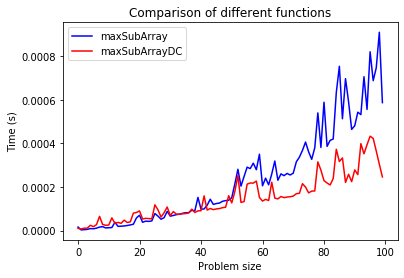

In [135]:
compareTwoFunctions(gen_random,timer,maxSubArray,maxSubArrayDC,100)

Congratulations, you are done!